O dataset escolhido para o MVP foi retirado do repositório UCI, consistindo em informações provenientes da pesquisa censitária de 1994 nos Estados Unidos. Trata-se de um dataset com dados estruturados.

<h1> 1. DEFINIÇÃO DO PROBLEMA <h1>

*1.1 Descrição do Problema | Tipo de Aprendizado*
<br> O dataset possui como *target* uma variável categórica binária, determinando se o indíviduo possui **renda anual acima de USD 50 mil**, na data-base de 1994. A partir de variáveis quantitativas e qualitativas, é possível empregar um modelo de classificação, separando o dataset em amostras de "treino" e "teste" para a predição da variável target binária. </br>
<br>

*1.2 Premissas e Hipóteses*
<br> As minhas premissas iniciais baseiam-se na assunção de que haja um efeito positivo (como nesse caso, a variável **renda anual acima de USD 50 mil** é binária, não podemos falar que haja correlação) entre as seguintes variáveis, e a variável target **renda anual acima de USD 50 mil**: </br>

1.   **Idade**: minha premissa é de que pessoas com **idades maiores** possuam mais experiência de trabalho e, portanto, de forma geral ocupam cargos mais sêniores, que possuem remuneração mais elevada. Mas essa presunção está sujeita a diversas críticas e desconstruções em virtude de variáveis categóricas, como função de trabalho e tipo de empregador. 
2.   **Anos Estudo**: minha premissa é de que pessoas com mais anos de estudo, de forma geral, sejam mais especializadas e, portanto, haja maior demanda por seu tipo de trabalho.
3.   **Horas Semanais Trabalhadas:** dado que a amostra é retirada do censo de 1994 dos EUA, como o regime trabalhista permite a contratação por hora de trabalho, a rigor, quanto mais horas trabalhadas, maior a renda. No entanto, há de se levar em conta que, nestes casos, a renda é proveniente do produto entre **# de horas trabalhadas** x **salário por hora**


*1.3 Definição dos Atributos do Dataset*
<br> O dataset possui 14 atributos conforme elencado abaixo: </br>

1.   **age:** idade | variável numérica discreta
2.   **workclass:** tipo de relação trabalhista/empregador | variável categórica nominal
3.   **fnlwgt:** peso ponderado da observação na amostra baseado na representatividade na população | variável contínua numérica
4.   **education:** nível de formação educacional | variável categórica ordinal
5.   **education-num**: número de anos de estudo | variável discreta numérica
6.   **marital-status**: estado civil | variável categórica nominal
7.   **occupation**: profissão | variável categórica nominal
8.   **relationship**: ocupação familiar | variável categórica nominal
9.   **race**: etnia | variável categórica nominal
10.  **sex**: gênero | variável categórica nominal
11.  **capital-gain**: valor auferido em ganhos de capital ao longo do ano | variável numérica contínua
12.  **capital-loss**: valor negativo de ganhos de capital ao longo do ano | variável numérica contínua
13.  **hours-per-week**: número de horas trabalhadas por semana | variável numérica contínua 
14. **native-country**: país de nascimento do indivíduo | variável categórica nominal 


*1.4 Restrições ou Condições para selecionar os dados*
<br> Por se tratar de uma base de dados provenientes de um censo populacional, há alguns disclaimers a serem feitos acerca dos dados colhidos:
 </br>

*   **Viés da Amostra**: Por mais que a variável **"fnlwgt"** busque retirar vieses da amostra colhida pelo censo, pode haver falhas em sua aplicação.
*   **Auto-declaração**: Os dados censitários são recolhidos a partir de auto-declaração, o que não necessariamente se traduzirá em declarações sem vieses ou distorção
*   **Restrição de respostas**: A opção para resposta em atributos cujo conteúdo é de natureza nominal categórica, pode impor um universo limitado declaratório
*   **Correlação entre atributos**: Pode existir uma correlação significativa entre dois atributos ou mais. Por exemplo, a quantidade de anos em nível de formação educacional, tende a ser maior para indivíduos com maior idade

Há, por fim, uma questão na aplicação deste dataset para treinamento de um modelo de predição: a base é referente a apenas um ano, de 1994, sendo um ponto discreto na coleta de dados censitários. Portanto, pode haver vieses específicos do ano de 1994 que irão influenciar a qualidade de predição. Destes, entendo que as duas variáveis relacionadas a ganhos de capital (**"capital-gain"** e **"capital-loss"**) são exemplos emblemáticos, visto que, ganhos de capital, como via de regra, não advém de "streams" relativamente estáveis de renda (como, por exemplo, é o caso de **salários** e **dividendos**), mas de eventos específicos de liquidez (como é o caso de **venda de bens móveis e imóveis**), que possuem natureza estocástica.

In [2]:
# importação dos pacote pandas
import pandas as pd

# link para importar o arquivo de destino
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

#labels para modificar o nome de cada coluna a fim de deixá-las auto-explicativas
labels = ["idade", "tipo_emprego", "ponderacao", "formacao", "anos_estudo", "estado_civil", "profissao", "ocupacao_familiar", "etnia", "genero", "capganho", "capganho_neg", "horas_semanais_trab", "origem", "renda_anual_acima_de_50k"]

# importar dataset
base_censo_94 = pd.read_csv(link, header=12, names=labels, index_col = False)
base_censo_94.head(5)

,idade,tipo_emprego,ponderacao,formacao,anos_estudo,estado_civil,profissao,ocupacao_familiar,etnia,genero,capganho,capganho_neg,horas_semanais_trab,origem,renda_anual_acima_de_50k
0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
1,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K


<h1> 2. ANÁLISE DE DADOS <h1>

Após checar que as colunas se encontram com cabeçalhos condizentes após a importação do arquivo .csv e aplicação dos labels nos atributos, vou checar se há valores nulos nas colunas, já tendo visto acima que valores não respondidos parecem estar assinalados por "?".

In [3]:
# checar informações básicas sobre as colunas
print(base_censo_94.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32548 entries, 0 to 32547
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     32548 non-null  int64 
 1   tipo_emprego              32548 non-null  object
 2   ponderacao                32548 non-null  int64 
 3   formacao                  32548 non-null  object
 4   anos_estudo               32548 non-null  int64 
 5   estado_civil              32548 non-null  object
 6   profissao                 32548 non-null  object
 7   ocupacao_familiar         32548 non-null  object
 8   etnia                     32548 non-null  object
 9   genero                    32548 non-null  object
 10  capganho                  32548 non-null  int64 
 11  capganho_neg              32548 non-null  int64 
 12  horas_semanais_trab       32548 non-null  int64 
 13  origem                    32548 non-null  object
 14  renda_anual_acima_de_5

Como ao declarar o método ".head()", fica claro que há inputs com "?" para dados não inputados, importo o pacote **numpy** para substituir todos e quaisquer inputs de **"?"** no dataset por **"NaN"** e resumir quantas entradas faltantes há em cada coluna do dataset.

In [4]:
# importar o pacote numpy
import numpy as np

# substituir valores "?" por NaN e checar quais colunas possuem variáveis não-preenchidas
base_censo_94.replace(" ?", np.nan, inplace=True)
print(base_censo_94.isna().sum())

idade                          0
tipo_emprego                1836
ponderacao                     0
formacao                       0
anos_estudo                    0
estado_civil                   0
profissao                   1843
ocupacao_familiar              0
etnia                          0
genero                         0
capganho                       0
capganho_neg                   0
horas_semanais_trab            0
origem                       583
renda_anual_acima_de_50k       0
dtype: int64


In [5]:
# checar se substituição foi realizada de forma correta
base_censo_94.head(5)

,idade,tipo_emprego,ponderacao,formacao,anos_estudo,estado_civil,profissao,ocupacao_familiar,etnia,genero,capganho,capganho_neg,horas_semanais_trab,origem,renda_anual_acima_de_50k
0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
1,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K


Com o objetivo de tornar a visualização e manipulação de dados mais simples na sintaxe, substituo os valores da variável target **renda anual acima de USD 50 mil** pelos seguintes:
a) maior do que USD 50 mil (> 50k): 1
b) menor ou igual a USD 50 mil (<= 50k): 0

Como existem apenas duas variáveis, vou utilizar o método **replace**.

In [6]:
base_censo_94.groupby("renda_anual_acima_de_50k").size()

renda_anual_acima_de_50k
 <=50K    24712
 >50K      7836
dtype: int64

In [7]:
# substituindo os valores da coluna "renda_anual_acima_de_50k" para assumirem o caráter categórico binário de "sim" e "não" afim de facilitar
# o uso no código e na visualização para tratar a base
base_censo_94["renda_anual_acima_de_50k"] = base_censo_94["renda_anual_acima_de_50k"].replace({" >50K": 1, " <=50K": 0})

# checar se a mudança foi corretamente aplicada
base_censo_94.head()

,idade,tipo_emprego,ponderacao,formacao,anos_estudo,estado_civil,profissao,ocupacao_familiar,etnia,genero,capganho,capganho_neg,horas_semanais_trab,origem,renda_anual_acima_de_50k
0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0
1,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,0
3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0
4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,0


In [8]:
# checar métricas estatísticas das variáveis numéricas
base_censo_94.describe()

,idade,ponderacao,anos_estudo,capganho,capganho_neg,horas_semanais_trab,renda_anual_acima_de_50k
count,32548.000000,3.254800e+04,32548.000000,32548.000000,32548.000000,32548.000000,32548.000000
mean,38.581418,1.897819e+05,10.080220,1077.420671,87.338700,40.437815,0.240752
std,13.641884,1.055571e+05,2.572521,7386.353414,403.036908,12.345991,0.427547
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Como podemos observar, as métricas estatísticas do atributo **ponderacao** não geram muito significado. Alguns dos atributos, como **capganho** e **capganho_neg** (pela distribuição dos quartis) e **horas_semanais_trab** (pelos valores **máximo** e **mínimo**), despertam dúvidas sobre a distribuição de dados e potencial existência de *outliers*. Afim de analisar as distribuições visualmente, vou criar um histograma para avaliar o perfil das distribuições de variáveis numéricas.

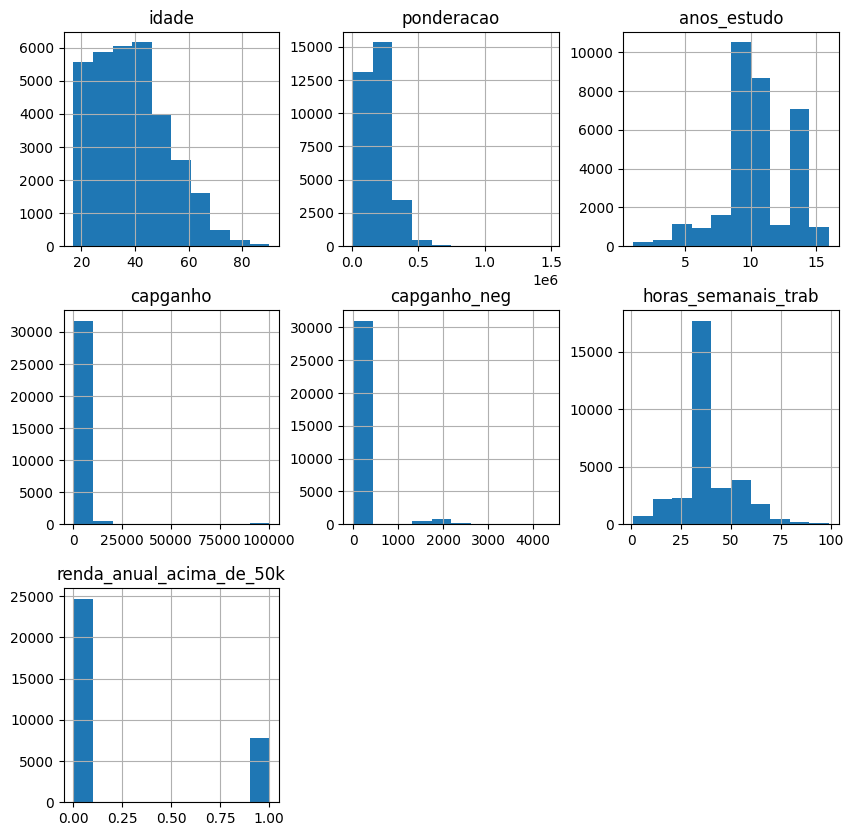

In [12]:
import matplotlib.pyplot as plt
base_censo_94.hist(figsize=(10,10))
plt.show()

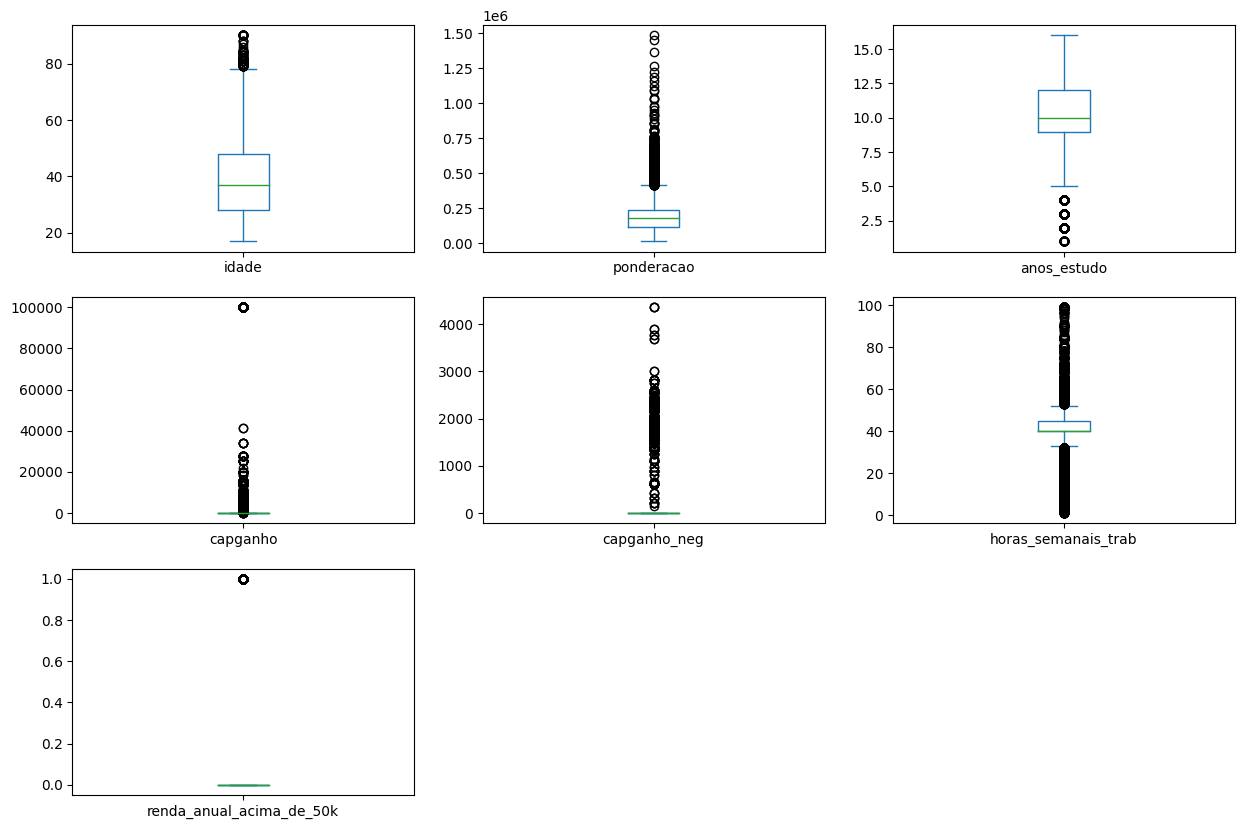

In [13]:
base_censo_94.plot(kind="box", subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir dos histogramas e dos gráficos de dispersão acima, fica evidente o caráter assimétrico dos seguintes atributos:


1.   idade
2.   capganho
3.   capganho_neg

Vale destacar ainda, que atributos do *dataset* como **anos_de_estudo** e **horas_semanais_trab** possuem *outliers* conforme exposto pelo boxplot.




Dada a característica pontual dos dados de ganho de capital representados por estes atributos, e a sua distribuição, é necessário avaliar a sua adequação/inclusão no modelo de *machine learning* para predição.

Com o intuito de olhar o *big picture* dos atributos, suas respectivas distribuições e eventuais relações entre si, vou utilizar o método Pairplot do pacote Seaborn, que reúne todos os tipos mencionados de visualização.

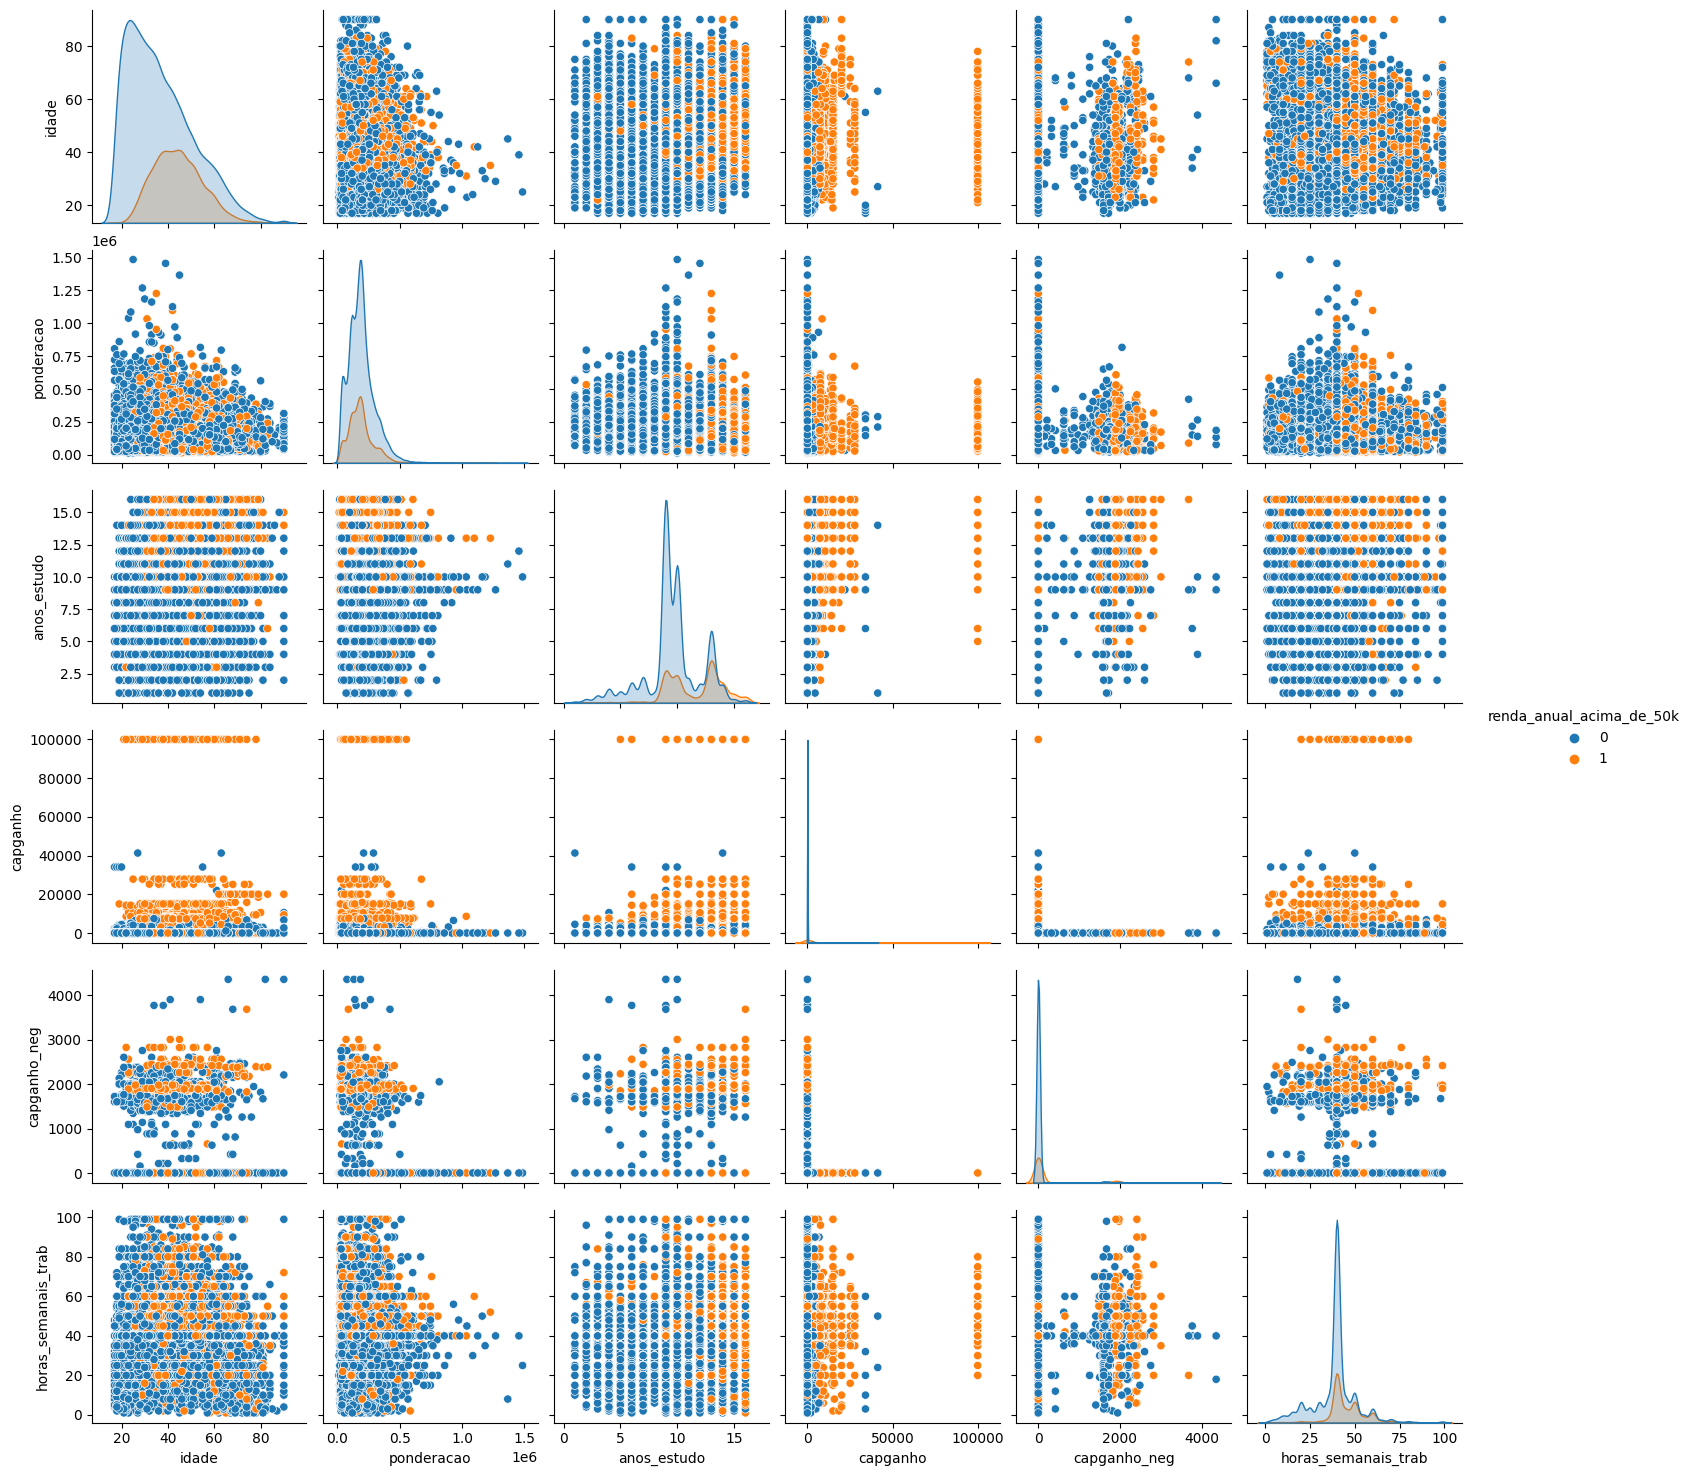

In [14]:
# importando o pacote seaborn
import seaborn as sns

# utilizando o método pairplot no pacote seaborn
sns.pairplot(data=base_censo_94, hue="renda_anual_acima_de_50k")

A análise dos gráficos de dispersão, sugere que, quanto maior os **anos_estudo** e maior a **idade**, maior é a população com renda acima de **US$ 50k**. A análise corrobora com duas das hipóteses iniciais. Vou utilizar o heatmap para explorar a correlação entre as todas as variáveis, mas especialmente para as variáveis **anos_estudo** e **idade** cuja própria natureza de relação pode incorrer em alta correlação. 



<ipython-input-15-76b8a86c7070>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_censo_94.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)


<Axes: >

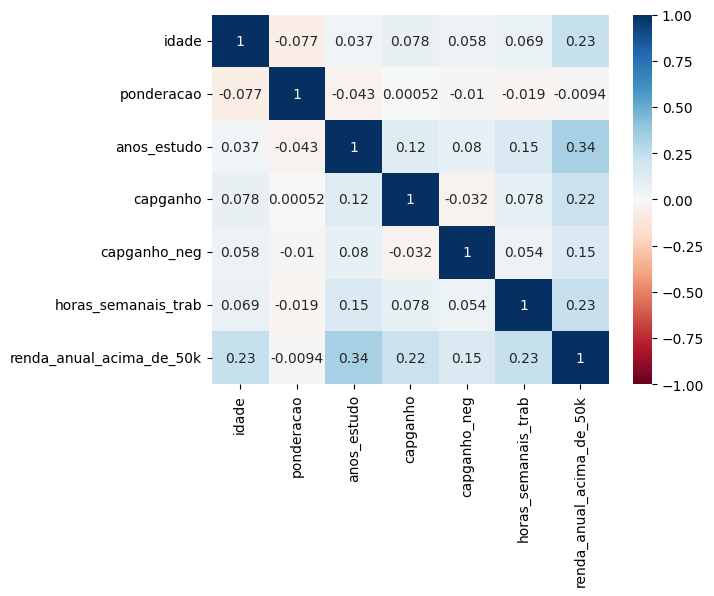

In [15]:
sns.heatmap(base_censo_94.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)

Conforme hipótese inicial, os atributos **anos_estudo** e **idade** possuem a maior correlação entre atributos do dataset, de **0.23**. Os atributos **idade** e **horas_semanais_trab** possuem o segunda maior índice de correlação entre os atributos, de **0.15**. A rigor, não é possível retirar conclusões específicas sobre essas correlações.
Em tempo, a correlação da variável *target* com os demais atributos não deve ser utilizada para se chegar a conclusões definitivas.
De forma geral, não existem correlações relevantes entre os atributos do dataset. 

<h1> 3. PRÉ-PROCESSAMENTO DE DADOS <h1>

Após realizar a análise dos dados, é necessário passar pela etapa de pré-processamento de dados.
Como início de pré-tratamento, eliminarei os valores missing já apurados.

In [16]:
# listagem de ocorrências de valores missing
base_censo_94.isnull().sum()

idade                          0
tipo_emprego                1836
ponderacao                     0
formacao                       0
anos_estudo                    0
estado_civil                   0
profissao                   1843
ocupacao_familiar              0
etnia                          0
genero                         0
capganho                       0
capganho_neg                   0
horas_semanais_trab            0
origem                       583
renda_anual_acima_de_50k       0
dtype: int64

Por razões qualitativas e de distribuição, retirarei do dataset os atributos de **ponderacao**, **ganhocap** e **ganhocap_neg**.

In [17]:
# exclusão de linhas com entradas de valores missing
censo94_tratado = base_censo_94.dropna(how="any")
censo94_tratado.head(5)

,idade,tipo_emprego,ponderacao,formacao,anos_estudo,estado_civil,profissao,ocupacao_familiar,etnia,genero,capganho,capganho_neg,horas_semanais_trab,origem,renda_anual_acima_de_50k
0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,0
3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0
4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,0
5,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0


In [18]:
# checagem para apurar se as linhas com valores missing foram corretamente excluídas do dataset
censo94_tratado.isna().sum()

idade                       0
tipo_emprego                0
ponderacao                  0
formacao                    0
anos_estudo                 0
estado_civil                0
profissao                   0
ocupacao_familiar           0
etnia                       0
genero                      0
capganho                    0
capganho_neg                0
horas_semanais_trab         0
origem                      0
renda_anual_acima_de_50k    0
dtype: int64

Com o objetivo de normalizar as distribuições dos atributos **idade**, **anos_estudo** e **horas_semanais_trab**, vou utilizar o **MinMaxScaler** do pacote scikit-learn.

In [27]:
# importando o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

normalizacao = MinMaxScaler()

# adicionando os atributos para normalização
normalizacao.fit(censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]])

# normalizando os atributos
censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]] = normalizacao.transform(censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]])

# verificando output dos atributos normalizados
censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]]

<ipython-input-27-62fe91df4036>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]] = normalizacao.transform(censo94_tratado[["idade", "anos_estudo", "horas_semanais_trab"]])


,idade,anos_estudo,horas_semanais_trab
0,0.205479,0.733333,0.500000
2,0.232877,0.200000,0.448980
3,0.109589,0.533333,0.346939
4,0.205479,0.533333,0.397959
5,0.287671,0.400000,0.500000
...,...,...,...
32543,0.136986,0.733333,0.377551
32544,0.315068,0.533333,0.397959
32545,0.561644,0.533333,0.397959
32546,0.068493,0.533333,0.193878
